In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('smoke_sensor_reading.csv')
df.head()

,Date,Data
0,2017-01-31,0.993428
1,2017-02-28,5.023471
2,2017-03-31,10.555631
3,2017-04-30,13.946060
4,2017-05-31,9.391947


In [4]:
# split the data into training and testing sets
train = df.iloc[:-24]
test = df.iloc[-24:]


In [5]:
model = SARIMAX(train['Data'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83677D+00    |proj g|=  2.20128D-01

At iterate    5    f=  1.70249D+00    |proj g|=  2.11352D-02

At iterate   10    f=  1.69696D+00    |proj g|=  3.31336D-03

At iterate   15    f=  1.69636D+00    |proj g|=  2.67540D-03

At iterate   20    f=  1.69622D+00    |proj g|=  1.63190D-03

At iterate   25    f=  1.69619D+00    |proj g|=  9.63698D-04

At iterate   30    f=  1.69618D+00    |proj g|=  2.13046D-04

At iterate   35    f=  1.69618D+00    |proj g|=  1.40974D-04

At iterate   40    f=  1.69618D+00    |proj g|=  6.37780D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

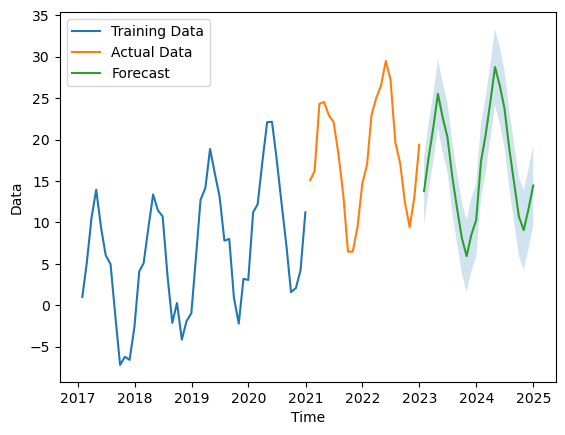

In [6]:

forecast = results.get_forecast(steps=24)
forecast_mean = forecast.predicted_mean.values
forecast_lower = forecast.conf_int().iloc[:, 0]
forecast_upper = forecast.conf_int().iloc[:, 1]
forecast_time = pd.date_range('2023-01-01', '2024-12-31', freq='M')

plt.plot(train['Date'], train['Data'], label='Training Data')
plt.plot(test['Date'], test['Data'], label='Actual Data')
plt.plot(forecast_time, forecast_mean, label='Forecast')
plt.fill_between(forecast_time, forecast_lower, forecast_upper, alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Data')
plt.legend()
plt.show()
